<a href="https://colab.research.google.com/github/RizkyFitriAndini/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


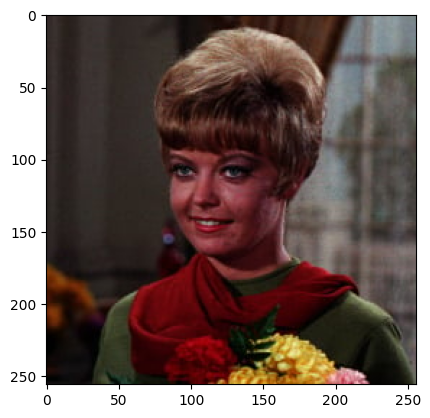

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Kecerahan: 3


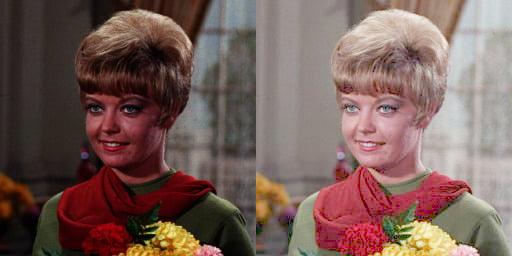

In [4]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat SImulasi Image Depth

Image Depth
----------------------


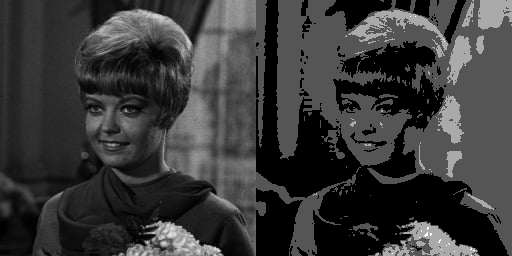

In [5]:
print('Image Depth')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape,original.dtype)

# melakukan akses setiap piksel pada grayscale
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    img_depth[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original,img_depth))
cv2_imshow(final_frame)

3.  Buat modul Average Denoising

3.1 Jumlah Citra di Average 5

Nilai PSNR (db):  19.529499095315575  dB


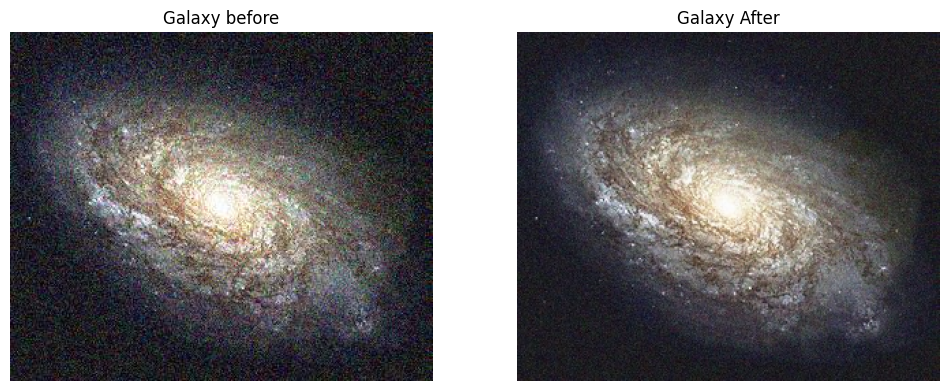

In [6]:
import glob
import cv2
from math import sqrt, log10

def PSNR(img1, img2):
  mse = np.mean((img1-img2)**2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 5 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.2 Jumlah Citra di Average 10

Nilai PSNR (db):  19.737045414813295  dB


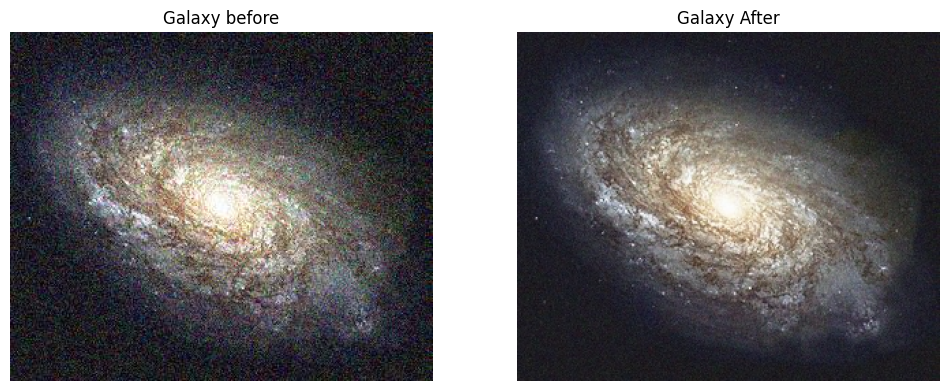

In [7]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')
# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 10 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.3 Jumlah Citra di Average 20

Nilai PSNR (db):  19.841221336745555  dB


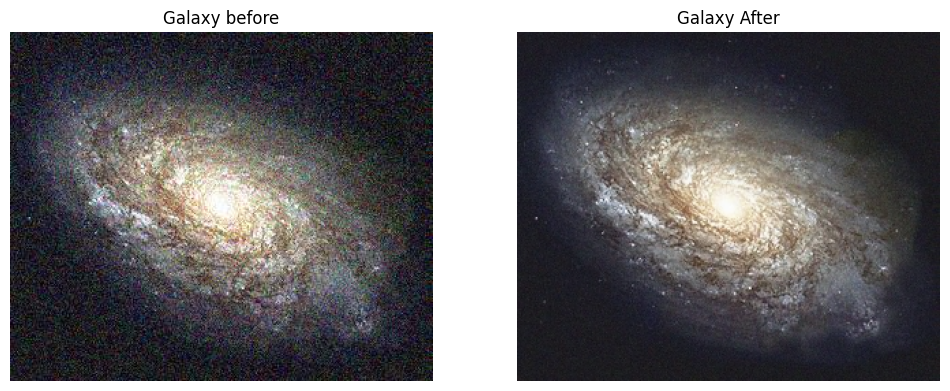

In [8]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 20 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.4 Jumlah Citra di Average 40

Nilai PSNR (db):  19.89307125507169  dB


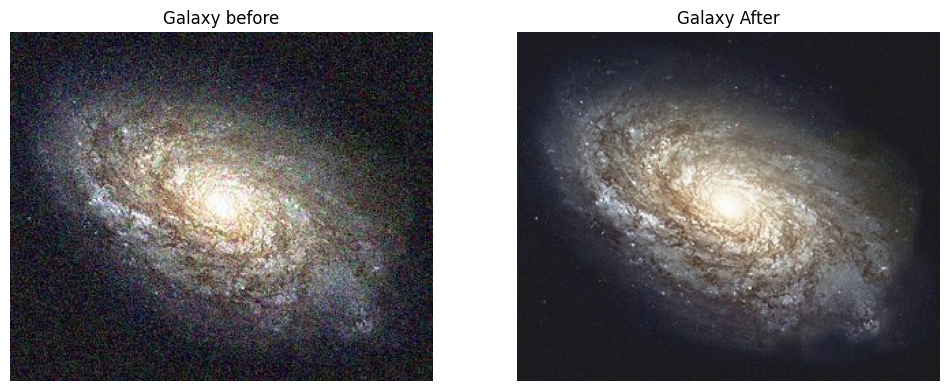

In [9]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 40 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.5 Jumlah Citra di Average 80

Nilai PSNR (db):  19.917187259975087  dB


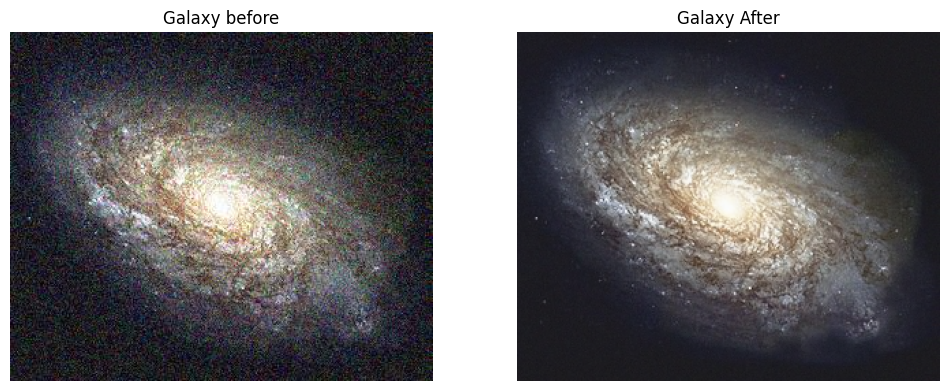

In [10]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 80 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()


3.6 Jumlah Citra di Average 100

Nilai PSNR (db):  19.92196095594035  dB


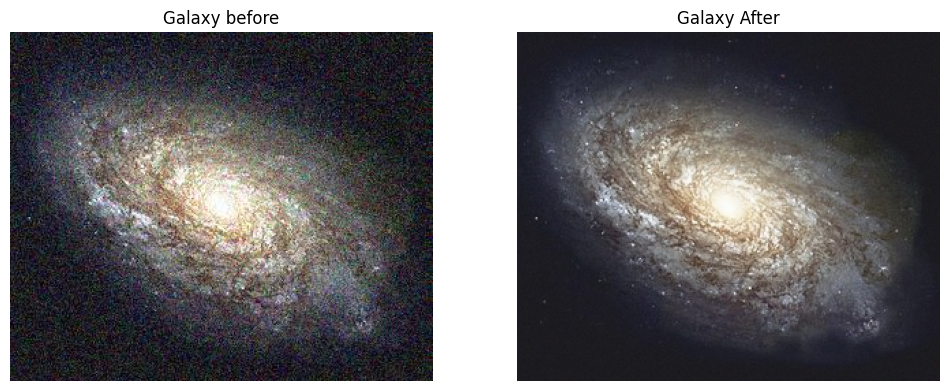

In [11]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 100 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Hasil analisis PSNR dari proses averaging citra menunjukkan bahwa seiring dengan meningkatnya jumlah citra yang digunakan, noise pada gambar akan semakin berkurang. Penambahan lebih banyak citra dalam proses averaging berfungsi untuk mereduksi gangguan warna, sehingga menghasilkan citra yang lebih bersih dan lebih jelas. Dengan menggabungkan informasi dari berbagai citra, noise yang tidak diinginkan dapat diminimalkan, sehingga kualitas gambar keseluruhan meningkat. Namun, penting untuk mempertimbangkan jumlah citra yang digunakan, karena jika terlalu banyak citra ditambahkan, kualitas dapat terpengaruh secara negatif.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP), sedangkan image paling kanan adalah hasilnya:

Text(0.5, 1.0, 'Output Image')

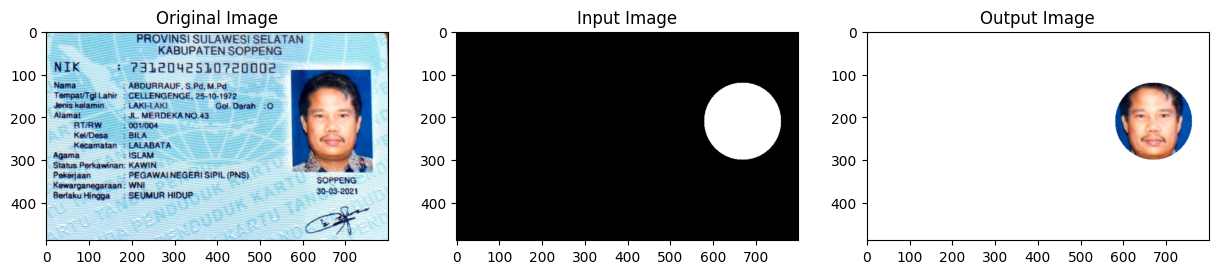

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')

mask = np.zeros(img.shape[:2], dtype="uint8")
cv.circle(mask, (670, 210), 90, 255, -1)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

white_background = np.ones_like(img) * 255
masked = np.where(mask == 255, img, white_background)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(mask)
plt.title('Input Image')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked, cv.COLOR_BGRA2RGBA))
plt.title('Output Image')

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

5.1 NOT

Text(0.5, 1.0, 'Image Output')

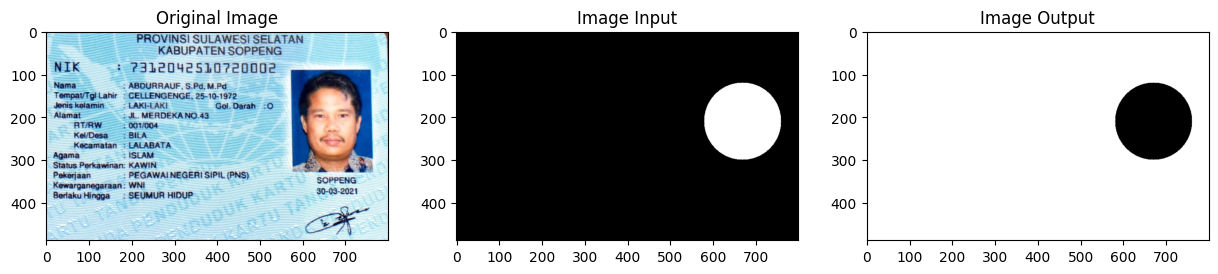

In [26]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv.circle(mask, (670, 210), 90, 255, -1)
result = ~mask
plt.figure(figsize=(15, 10))


plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Image Input')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Image Output')

5.2 OR

Text(0.5, 1.0, 'Image Output')

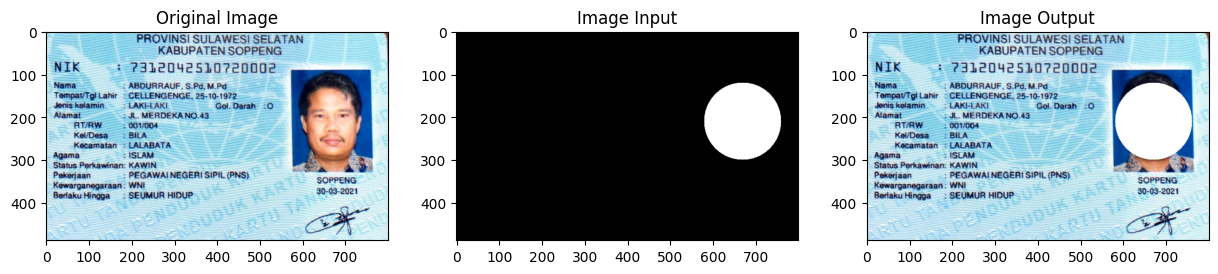

In [34]:
mask = np.zeros_like(img)
cv.circle(mask, (670, 210), 90, (255,255,255), -1)
result = img | mask
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Image Input')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Image Output')

5.3 AND

Text(0.5, 1.0, 'Image Output')

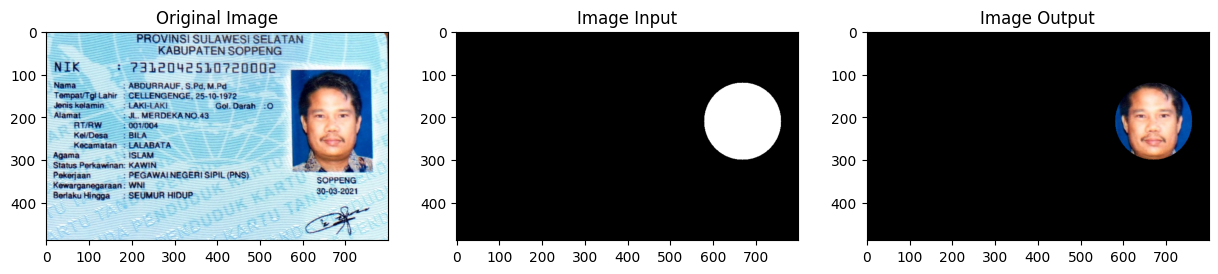

In [35]:
mask = np.zeros_like(img)
cv.circle(mask, (670, 210), 90, (255,255,255), -1)
result = img & mask
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Image Input')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Image Output')

5.4 NAND

Text(0.5, 1.0, 'Image Output')

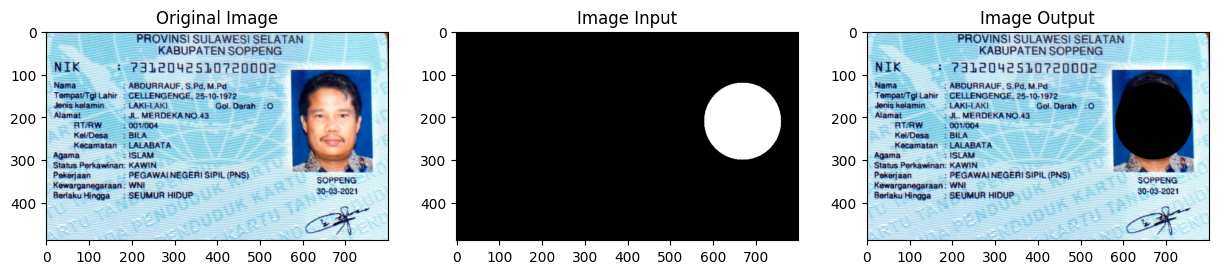

In [36]:
mask = np.zeros_like(img)
cv.circle(mask, (670, 210), 90, (255,255,255), -1)
result = img & ~mask
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Image Input')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Image Output')

5.5 XOR

Text(0.5, 1.0, 'Image Output')

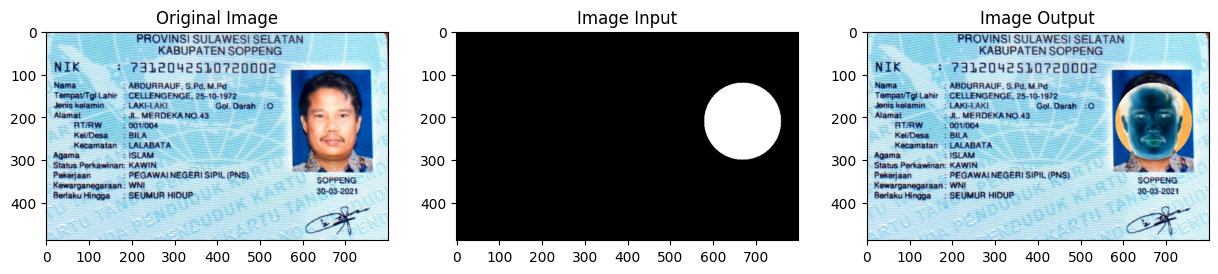

In [37]:
mask = np.zeros_like(img)
cv.circle(mask, (670, 210), 90, (255,255,255), -1)
result = img ^ mask
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Image Input')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Image Output')

NOT (Komplemen) : Gambar yang dihasilkan menunjukkan warna yang sepenuhnya terbalik dari gambar asli.

OR (Atau) : Hasil menunjukkan gambar original diluar area lingkaran.

AND (Dan) : Hanya bagian gambar yang berada di dalam lingkaran yang terlihat, sementara area di luar lingkaran menjadi hitam.

NAND (Not AND) : Hasilnya adalah invers dari area yang dihasilkan oleh AND.

XOR (Exlusive Or) : Hasil dari gambar yang diterapkan operator XOR menunjukkan inverse yang berada di dalam dan yang original di luar area.